In [1]:
import pandas as pd
import datetime as dt
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import requests
import json
from urllib.parse import urlencode 

In [2]:
sns.set(
    font_scale=1.3,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

###### Выгрузим наши данные, посмотрим размеры датафреймов и приведем данные к нужным  нам типам

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/dZIK8DHqTA9ymg' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
customers = pd.read_csv(download_url) 

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/K6DJxM5hbn6ZBA' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
orders = pd.read_csv(download_url) 

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/mkORa9HEKDks2A' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
order_items = pd.read_csv(download_url) 

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.shape

(99441, 5)

In [6]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders.shape

(99441, 8)

In [9]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [10]:
orders = orders.astype({'order_purchase_timestamp': 'datetime64',
                        'order_approved_at': 'datetime64',
                        'order_delivered_carrier_date': 'datetime64', 
                        'order_delivered_customer_date': 'datetime64',
                        'order_estimated_delivery_date': 'datetime64'})

In [11]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_items.shape

(112650, 7)

In [13]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [14]:
order_items = order_items.astype({'shipping_limit_date': 'datetime64'})

## 1. Расчет кол-ва пользователей, которые совершили покупку только один раз

###### В качестве покупки будем считать все заказы, кроме недоступных(unavailable) и отмененных (canceled).

In [15]:
customers_orders = customers.merge(orders, how='inner', on='customer_id')

In [16]:
customers_orders.query('order_status != "canceled" and order_status != "unavailable"') \
                .groupby('customer_unique_id', as_index = False) \
                .agg({'order_id': 'count'})  \
                .query('order_id == 1 ').count()

customer_unique_id    92102
order_id              92102
dtype: int64

###### В нашем случае получается, что 92102 человека совершили покупку только один раз

## 2. Расчет среднего кол-ва заказов в месяц, которые не доставляется по разным причинам? 

###### Посмотрим распределение заказов по времени

In [17]:
customers_orders.astype({'order_purchase_timestamp': 'datetime64[M]'})\
                         .groupby('order_purchase_timestamp') \
                         .agg({'order_id' : 'count'})

,order_id
order_purchase_timestamp,
2016-09-01,4
2016-10-01,324
2016-12-01,1
2017-01-01,800
2017-02-01,1780
2017-03-01,2682
2017-04-01,2404
2017-05-01,3700
2017-06-01,3245


###### Выбираем данные с 2017-01 по 2018-08 (включительно), так как в другие месяца намного меньще покупок

###### Считаем что сегодня 2018-10-18

In [18]:
orders['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

###### Выбираем все недоставленные заказы, у которых отсутвует время доставки

In [19]:
not_delivered_orders = customers_orders.query('order_delivered_customer_date == "NaT" and \
                      order_status != "delivered" and order_purchase_timestamp >= "2017-01" and order_purchase_timestamp < "2018-08"')

In [20]:
not_delivered_orders = not_delivered_orders.astype({'order_estimated_delivery_date': 'datetime64[M]'})

###### Групируем данные по обещанной дате доставки, т.к. товары должны были уже быть доставлены

In [21]:
not_delivered_orders.groupby(['order_estimated_delivery_date']) \
                    .agg({'order_id' : 'count'}).mean()

order_id    143.105263
dtype: float64

###### В среднем в месяц не доставлаяется  143 заказа

###### Выведем детализацию причин недоставки товаров в среднем в месяц

In [22]:
not_delivered_orders.groupby(['order_estimated_delivery_date', 'order_status']) \
                    .agg({'order_id' : 'count'})\
                    .reset_index() \
                    .pivot(index = 'order_estimated_delivery_date', columns = 'order_status', values ='order_id') \
                    .fillna(0).mean().to_frame().reset_index().rename(columns={0 : 'mean'})

,order_status,mean
0,approved,0.105263
1,canceled,26.052632
2,created,0.263158
3,invoiced,14.368421
4,processing,15.736842
5,shipped,55.263158
6,unavailable,31.315789


###### Визуализиреуем наши данные

In [23]:
not_delivered_orders_visual = not_delivered_orders.groupby(['order_status', 'order_estimated_delivery_date'], as_index = False).agg({'order_id' : 'count'})

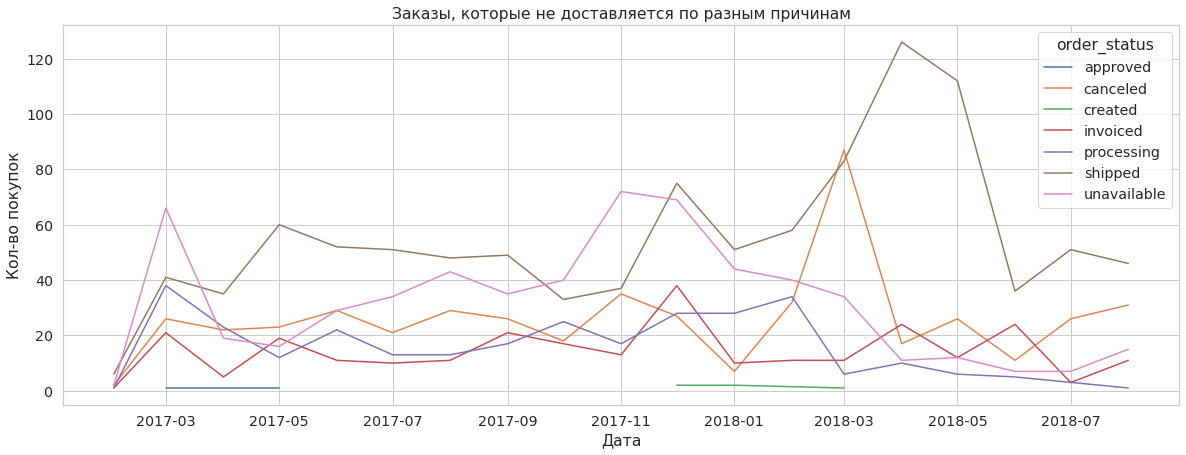

In [24]:
sns.lineplot(data = not_delivered_orders_visual, x="order_estimated_delivery_date", y="order_id", hue='order_status')
plt.xlabel('Дата')
plt.ylabel('Кол-во покупок')
plt.title('Заказы, которые не доставляется по разным причинам')
plt.show()

###### На данном графика представлено распределение кол-ва заказов по их статусу, в зависимости от даты их планируемой доставки. 
###### Последння покупка в наших данных датируется 2018-10-17, поэтому считаем это дату наиболее актуальной. Клиенты уже должны были получить их товары, но этого не произошлою. График показывает, большая часть товаров не доставлятеся после отгрузки со склада. Также проблемы возникают с недоступными и отмененными заказами

## 3. Определение в какой день недели товар чаще всего покупается каждый товар. 

##### Соединим две таблицы и добавим новый столбец с названием днем недели

In [25]:
order_items_orders_merged = order_items.merge(orders, on='order_id')

In [26]:
order_items_orders_merged['order_purchase_day'] = order_items_orders_merged['order_purchase_timestamp'].dt.day_name()

###### Применим использованное ранее условие покупок и даты

In [27]:
order_items_orders_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday


###### Посчитаем кол-во покупок для каждого товара в каждый день недели

In [28]:
orders_days = order_items_orders_merged.query('order_status != "canceled" and order_status != "unavailable" \
                   and order_purchase_timestamp >= "2017-01" and order_purchase_timestamp < "2018-08"') \
                  .groupby(['order_purchase_day', 'product_id'], as_index = False) \
                  .agg({'order_id' : 'count'})

###### Также посчитаем максимальное кол-во покупоку для каждого товара

In [29]:
orders_max = orders_days.groupby('product_id', as_index=False).agg({'order_id':'max'})

###### Объединим получившиеся таблицы и оставим строки с максимальным кол-вом покупок для каждого товара

In [30]:
orders_days_max = orders_days.merge(orders_max, how = 'left', on = 'product_id').query('order_id_x == order_id_y')

###### Сгрупируем по товарам  и получим датафрейм, который дает информацию о товаре и дне недели, когда его чаще всего покупают

In [31]:
orders_days_max = orders_days_max.groupby('product_id', as_index=False).agg({'order_purchase_day': lambda x: ", ".join(x)})

In [32]:
orders_days_max.head()

,product_id,order_purchase_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000d9be29b5207b54e86aa1b1ac54872,Tuesday
4,0011c512eb256aa0dbbb544d8dffcf6e,Thursday


###### Для получения дополнительной информации, можно визуализировать в какой день происходит больше всего покупок. В нашем датафрейме есть товары, которые часто покупаются в различные дни недели. Такие покупки мы посчитаем отдельно

In [33]:
orders_days_max_visual = orders_days_max.groupby('order_purchase_day',as_index = False).agg({'product_id' : 'count'})

In [34]:
orders_days_max_visual.query('order_purchase_day not in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday",]')\
                     .agg({'product_id' : 'sum'})

product_id    6575
dtype: int64

 ###### Частых покупок в несколько дней недели получается 6575. Отберем товары, покупаемые в один день недели и создадим дополнительно строку

In [35]:
orders_days_max_visual = orders_days_max_visual.query('order_purchase_day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday",]')

In [36]:
orders_days_max_visual.loc[len(orders_days_max_visual.index)] = ['Several days', '6575']

In [37]:
orders_days_max_visual = orders_days_max_visual.astype({'product_id': 'int32'})

In [38]:
orders_days_max_visual = orders_days_max_visual.sort_values('product_id', ascending = False).rename(columns={'product_id' : 'orders'})

In [39]:
orders_days_max_visual.head()

,order_purchase_day,orders
7,Several days,6575
63,Monday,4019
123,Tuesday,3901
125,Wednesday,3789
119,Thursday,3512


###### Визуализируем получившиеся данные

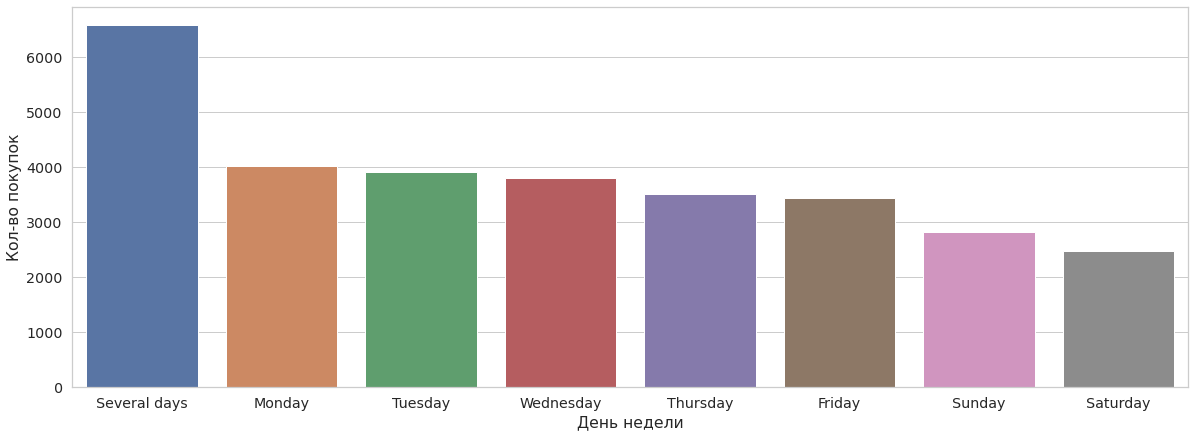

In [40]:
sns.barplot(data = orders_days_max_visual, x ='order_purchase_day', y = 'orders' )
plt.xlabel('День недели')
plt.ylabel('Кол-во покупок')
plt.show()

###### Мы видим, что у большинства товаров нет конктрентого "частого" дня покупки. Если такие не рассматривать, то чаще всего товары покупают в понедельник.

## 4. Расчет кол-ва  покупок в среднем в среднем в неделю (по месяцам) у каждого из пользователей.

###### Подготовка датафрейма

In [41]:
avg_orders = customers_orders.astype({'order_purchase_timestamp': 'datetime64[M]'})\
                .query('order_status != "canceled" and order_status != "unavailable" \
                and order_purchase_timestamp >= "2017-01" and order_purchase_timestamp < "2018-08"') \
                .groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index = False)\
                .agg({'order_id' : 'count'}) \

###### Найдем точное число недель в месяце. Далее расчитаем среднее число заказов в неделю

In [42]:
avg_orders['weeks'] = avg_orders['order_purchase_timestamp'].dt.days_in_month / 7
avg_orders['avg'] = (avg_orders['order_id']/avg_orders['weeks'])

###### Итоговый датафрейм, который показывает среднее кол-во заказов в неделю по месяцам для каждого пользователя

In [43]:
avg_orders = avg_orders.sort_values(['order_purchase_timestamp', 'avg']).drop('weeks', axis = 1).drop('order_id', axis = 1)
avg_orders.head()

,customer_unique_id,order_purchase_timestamp,avg
25,00115fc7123b5310cf6d3a3aa932699e,2017-01-01,0.225806
195,008f3d5f45a11059239a5c452cd00006,2017-01-01,0.225806
428,012e12f54f6e73b1faba89a119dab849,2017-01-01,0.225806
548,01838e7d69d87bd8ff2b6ff06789adfb,2017-01-01,0.225806
757,02251550f4d16aca44ce66e4263c0522,2017-01-01,0.225806


###### Также можно сделать визуализацию (красная линия показывает среднее кол-во покупок)

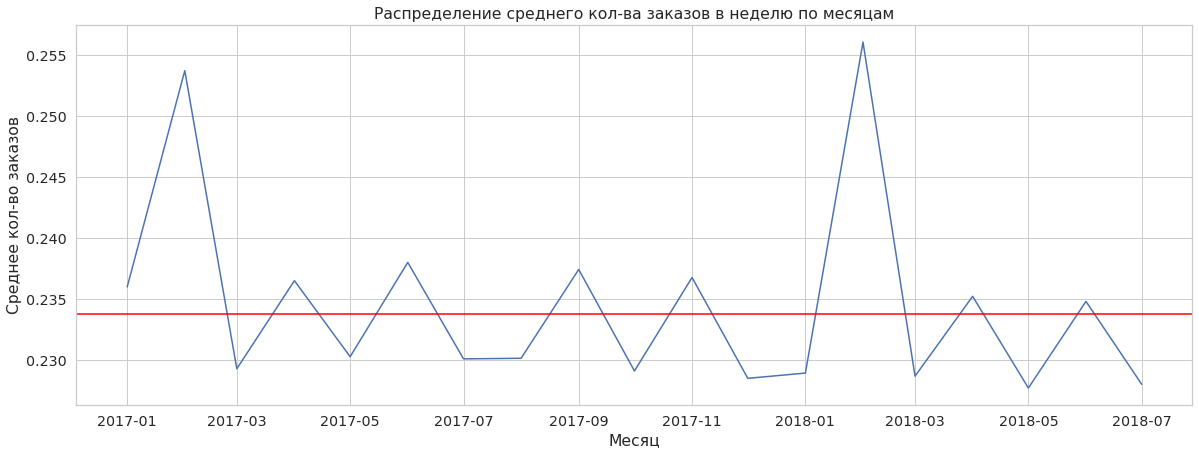

In [44]:
data = avg_orders.groupby('order_purchase_timestamp', as_index = False).agg({'avg' : 'mean'})
sns.lineplot(data = data, x = 'order_purchase_timestamp', y = 'avg')
plt.axhline(y=np.nanmean(avg_orders['avg']), color = 'red')
plt.xlabel('Месяц')
plt.ylabel('Среднее кол-во заказов')
plt.title('Распределение среднего кол-ва заказов в неделю по месяцам')
plt.show()

## 5. Определение когорты  пользователей с самым высоким retention на 3й месяц.

###### Для начала определим первый заказ пользователей. Соеденим таблицы и приведем данные к нужным типам. Будем рассматривать данные с января по декабрь 2017 года

In [45]:
first_orders = customers_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min()

In [46]:
first_orders = pd.DataFrame(data = first_orders).reset_index().query('order_purchase_timestamp >= "2017-01" and order_purchase_timestamp < "2018-01"')

In [47]:
customers_orders_merged = customers_orders.merge(first_orders, how = 'inner', on='customer_unique_id') 

In [48]:
customers_orders_merged = customers_orders_merged.rename(columns = {'order_purchase_timestamp_y' : 'first_order', 'order_purchase_timestamp_x' : 'order_purchase_timestamp'})\
                    .astype({'first_order': 'datetime64[M]','order_purchase_timestamp' : 'datetime64[M]'})

###### Сгрупируем пользователей по когортам и добавим колонку с номером месяца по счету

In [49]:
cohorts = customers_orders_merged.query('order_purchase_timestamp >= "2017-01" and order_purchase_timestamp < "2018-04"') \
                                 .groupby(['first_order', 'order_purchase_timestamp'])\
                                 .agg({'order_id' : 'nunique'})\
                                 .reset_index().rename(columns = {'first_order' : 'cohort', 'order_id' : 'value'})

In [50]:
cohorts['month'] = (((cohorts['order_purchase_timestamp'] - cohorts['cohort'] ) / np.timedelta64 ( 1 , 'M')) \
                    .round(0)).apply(lambda x: int(x))

###### Создадим датафрейм с колонкой, которая содержит значение кол-ва заказов в первый месяц для каждой когорты и приведем датафрейм в нормальный вид

In [51]:
cohorts_first = pd.DataFrame(cohorts.query('month == 0').set_index('cohort')['value']).reset_index()

In [52]:
cohorts = cohorts.merge(cohorts_first, on = 'cohort')
cohorts['value'] = cohorts['value_x']/cohorts['value_y'] 
cohorts['cohort'] = cohorts['cohort'].dt.strftime("%Y-%m")

In [53]:
cohorts = cohorts.drop(['order_purchase_timestamp','value_x','value_y'], axis = 1)\
                 .set_index('cohort').pivot(columns = 'month', values = 'value')

In [54]:
cohorts.head(3)

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,,
2017-01,1.0,0.003755,0.002503,0.001252,0.003755,0.001252,0.005006,0.001252,0.001252,NaN,0.003755,0.001252,0.007509,0.003755,0.001252
2017-02,1.0,0.002251,0.002814,0.001125,0.003939,0.001125,0.002251,0.001688,0.001688,0.002251,0.001125,0.002814,0.001688,0.001688,NaN
2017-03,1.0,0.005232,0.003737,0.004484,0.003363,0.001495,0.001495,0.002990,0.003363,0.000747,0.003737,0.001495,0.002242,NaN,NaN


###### Визуализируем полученный результат

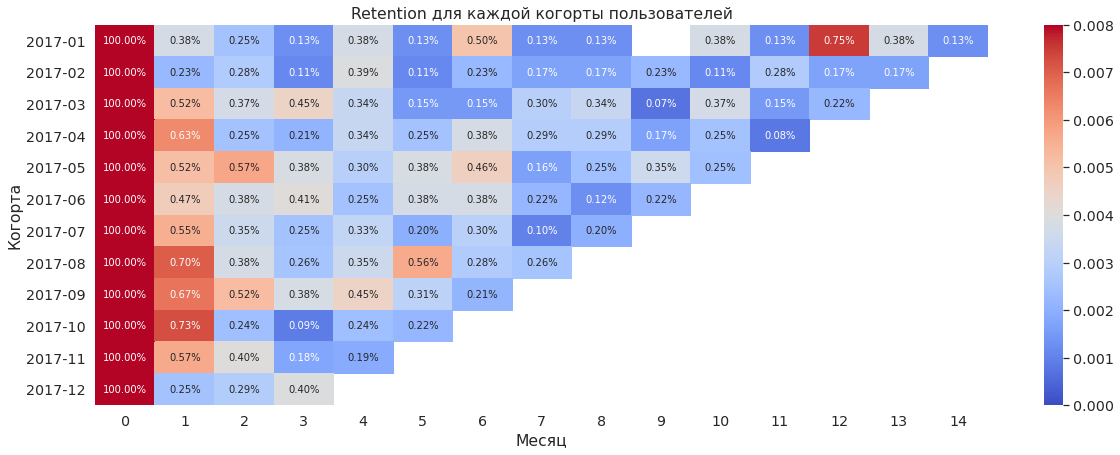

In [55]:
sns.heatmap(data = cohorts, annot=True,annot_kws={"size": 10}, fmt='.2%', vmin=0.0, vmax=0.008, cmap= 'coolwarm')

plt.xlabel('Месяц')
plt.ylabel('Когорта')
plt.title('Retention для каждой когорты пользователей')
plt.show()

###### Построения тепловая карта распределения когорт показывает, что на 3-й месяц наибольший retention имеет когорта пользователей, совершивших покупку в марте 2017

## 6.Построение RFM-сегментации пользователей, для качественной оценки аудитории.

###### Создадим датафрейм со всеми данными

In [56]:
order_items_orders = order_items.merge(orders, how = 'outer', on='order_id')

In [57]:
full_data = order_items_orders.merge(customers, how='inner', on='customer_id')

###### Определим "сегодняшнюю" дату

In [58]:
NOW = full_data['order_purchase_timestamp'].max() + dt.timedelta(days=1)
NOW

Timestamp('2018-10-18 17:30:18')

######  Подготовим датафрейм и создадим столбец, показывающий кол-во дней с последней покупки


In [59]:
RFM = full_data.query('order_status != "canceled" and order_status != "unavailable"')\
                .groupby(['order_id', 'customer_unique_id', 'order_purchase_timestamp'], as_index = False) \
                .agg({'price': 'sum'})

In [60]:
RFM['DaysSinceOrder'] = NOW - RFM['order_purchase_timestamp']

###### Сгрупируем датафрейм по клиентам и создадим столбцы с :
###### Recency — время прошедшее с даты  последней покупки
###### Frequency — частота покупок 
###### Monetary — сумма покупок

In [61]:
RFM = RFM.groupby('customer_unique_id', as_index = False)\
    .agg({'DaysSinceOrder' : 'min', 'order_id' : 'nunique', 'price': 'sum' })\
    .rename(columns={'DaysSinceOrder': 'Recency', 'order_id': 'Frequency', 'price': 'Monetary'})

In [62]:
RFM['Recency'] = RFM['Recency'].dt.days

###### Посмортим распределение наших показателей

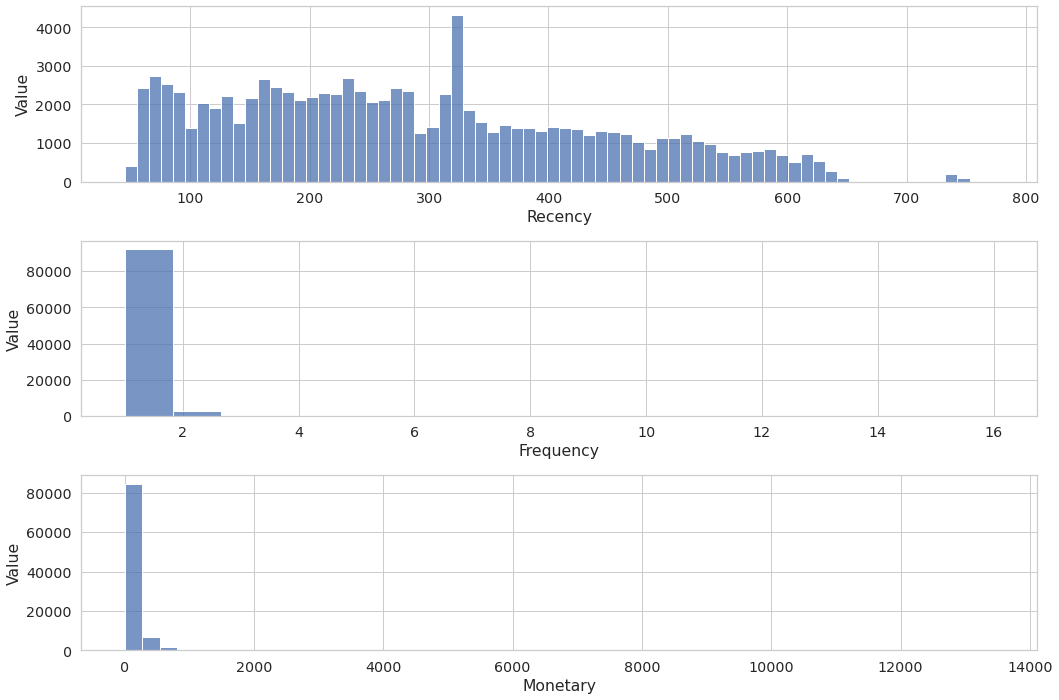

In [63]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.histplot(data = RFM, x ='Recency')
plt.ylabel('Value')

plt.subplot(3, 1, 2)
sns.histplot(data = RFM, x ='Frequency')
plt.ylabel('Value')

plt.subplot(3, 1, 3)
sns.histplot(data = RFM, x ='Monetary', bins = 50)
plt.ylabel('Value')

plt.tight_layout()
plt.show()

###### Наблюдаем асимметричные распределения

###### Определим границы для наших показателей и составим сегменты покупаталей. Для Recency и Monetary такими границами будут выступать 33 и 66 квантили, а для Frequency 1 и 2 покупки

In [64]:
quantiles = RFM.quantile(q=[0.33,0.66,]).to_dict()

In [65]:
quantiles

{'Recency': {0.33: 197.0, 0.66: 336.0},
 'Frequency': {0.33: 1.0, 0.66: 1.0},
 'Monetary': {0.33: 57.99, 0.66: 124.99}}

In [66]:
def R_Class(x):
    if x <=  quantiles['Recency'][0.33]:
        return 3
    elif x <= quantiles['Recency'][0.66]:
        return 2
    else:
        return 1
    
def F_Class(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

def M_Class(x):
    if x <= quantiles['Monetary'][0.33]:
        return 1
    elif x <= quantiles['Monetary'][0.66]:
        return 2
    else:
        return 3

###### Получаем следующие границы для показателей:
###### *Recency*:
    1: менее 197 дней
    2: от 197 до 336 дней
    3: более 336 дней

###### *Frequency*:
    1: менее 1 покупки
    2: от 1 до 2 покупок
    3: более 2 покупок

###### *Monetary*:
    1: менее 57.99 у.е.
    2: от 57.99 до 124.99 у.е.
    3: более 124.99 у.е.

In [67]:
RFM['R'] = RFM['Recency'].apply(lambda x: R_Class(x))
RFM['F'] = RFM['Frequency'].apply(lambda x: F_Class(x))
RFM['M'] = RFM['Monetary'].apply(lambda x: M_Class(x))


In [68]:
RFM['RFM_Score'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)
RFM.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,1,1,3,113


###### Получили сегменты пользователей. Теперь необходимо их "обозвать"

In [69]:
segments = {
            '111' : 'Разовые',
            '112' : 'Разовые',
            '113' : 'Разовые',
            '121' : 'Уходящие редкие',
            '122' : 'Уходящие редкие',
            '123' : 'Уходящие редкие',
            '131' : 'Уходящие постоянные',
            '132' : 'Уходящие щедрые постоянные',
            '133' : 'Уходящие VIP',
            '211' : 'Спящие разовые с маленьким чеком',
            '212' : 'Спящие разовые со средним чеком',
            '213' : 'Спящие разовые с высоким чеком',
            '221' : 'Спящие редкие с маленьким чеком',
            '222' : 'Спящие редкие со средним чеком',
            '223' : 'Спящие редкие с высоким чеком',
            '231' : 'Спящие постоянные с маленьким чеком',
            '232' : 'Спящие постоянные со средним чеком',
            '233' : 'Спящие VIP',
            '311' : 'Новички с маленьким чеком',
            '312' : 'Новички со средним чеком',
            '313' : 'Новички с высоким чеком',
            '321' : 'Редкие с маленьким чеком',
            '322' : 'Редкие со средним чеком',
            '323' : 'Редкие с высоким чеком',
            '331' : 'Постоянные с маленьким чеком',
            '332' : 'Постоянные со средним чеком',
            '333' : 'VIP'
            }

###### Добавим столбец с названием каждого сегмента. Далее посчитаем кол-во пользователей в каждом сегменте

In [70]:
RFM['Segment'] = RFM['RFM_Score'].apply(lambda x : segments[x])

In [71]:
RFM.groupby('Segment', as_index = False).agg({'customer_unique_id' : 'count'}) \
   .sort_values('customer_unique_id', ascending = False).rename(columns = {'customer_unique_id' : 'value_of_users'}).head()

,Segment,value_of_users
5,Разовые,31390
13,Спящие разовые с маленьким чеком,10499
3,Новички со средним чеком,10189
2,Новички с маленьким чеком,10135
1,Новички с высоким чеком,10044


###### Визуализируем результаты

In [72]:
RFM_pie = RFM.groupby('Segment', as_index = False).agg({'customer_unique_id' : 'count'}) \
             .sort_values('customer_unique_id', ascending = False)

###### Для корректного отображения оставим только первые 10 значений, остальные просуммируем 

In [73]:
RFM_pie.tail(15).sum()

Segment               Уходящие редкиеСпящие редкие с высоким чекомРе...
customer_unique_id                                                 2888
dtype: object

In [74]:
RFM_pie = RFM_pie.head(7)

In [75]:
RFM_pie.loc[len(RFM_pie.index)] = ['Другие', '2888']

In [76]:
RFM_pie = RFM_pie.astype({'customer_unique_id': 'int32'})

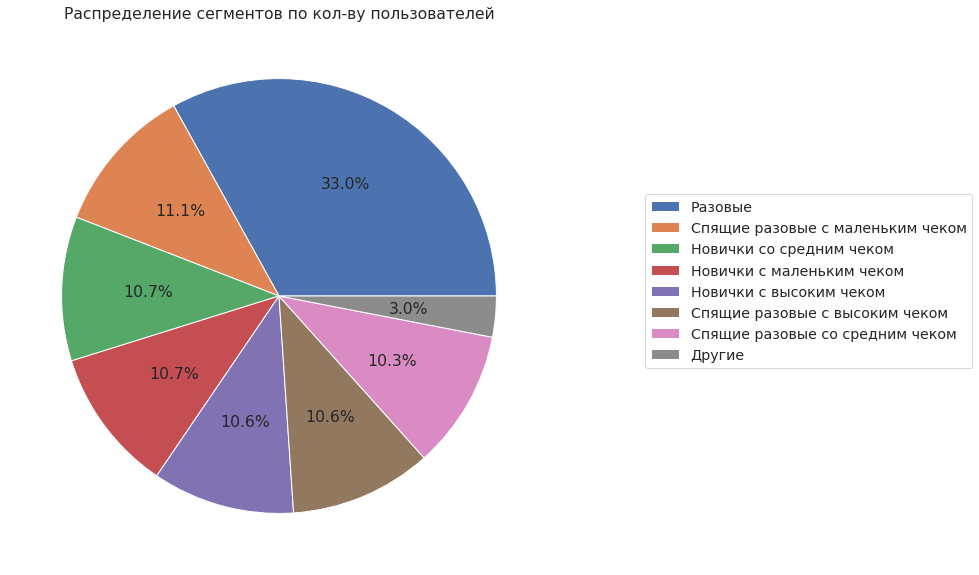

In [77]:
plt.figure(figsize=(15, 10))
plt.pie(RFM_pie['customer_unique_id'], autopct='%.1f%%')
plt.legend(bbox_to_anchor = (1.16, 0.45, 0.25, 0.25), loc = 'best', labels = RFM_pie['Segment'] )
plt.title('Распределение сегментов по кол-ву пользователей')
plt.show()
# Маленькие значения трудночитаемы, но видно что они составляют маленькую долю

###### Также визуализируем распределение сегментов по выручке

In [78]:
RFM_monetary = RFM.groupby('Segment', as_index = False).agg({'Monetary' : 'sum'})\
                  .sort_values('Monetary', ascending = False)

In [79]:
RFM_monetary.tail(15).sum()

Segment     Редкие с высоким чекомСпящие редкие с высоким ...
Monetary                                               750496
dtype: object

In [80]:
RFM_monetary = RFM_monetary.head(7)

In [81]:
RFM_monetary.loc[len(RFM_monetary.index)] = ['Другие', '750496']

In [82]:
RFM_monetary = RFM_monetary.astype({'Monetary': 'int32'})

In [83]:
RFM_monetary.head()

,Segment,Monetary
5,Разовые,4425090
1,Новички с высоким чеком,3017327
12,Спящие разовые с высоким чеком,2803624
3,Новички со средним чеком,910518
14,Спящие разовые со средним чеком,870313


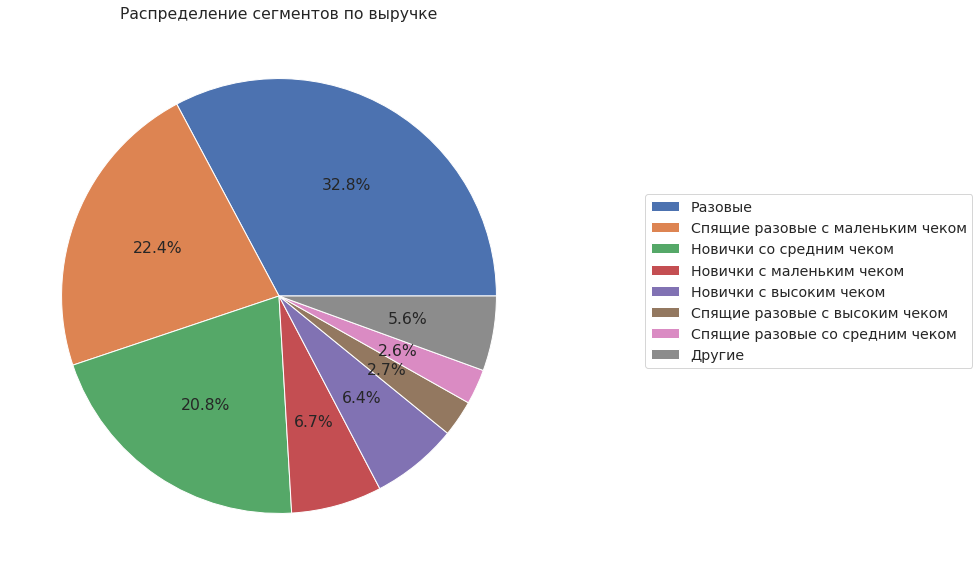

In [84]:
plt.figure(figsize=(15, 10))
plt.pie(RFM_monetary['Monetary'], autopct='%.1f%%')
plt.legend(bbox_to_anchor = (1.16, 0.45, 0.25, 0.25), loc = 'best', labels = RFM_pie['Segment'] )
plt.title('Распределение сегментов по выручке')
plt.show()

###### Исходя из RFM анализа можно сделать вывод, что у компании много разовых клиентов, которые ушли от компании. Также в последнее время появилось достаточное кол-во новых клиентов с различными суммами покупок. Данные клиенты приносят значительную часть выручки, поэтомуследует постараться их удержать. Имеются "спящие" разовые клиенты, которым следует напомнить о нас.